In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")


In [30]:
df = pd.read_csv("irrigation.csv")

In [31]:
df.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [33]:
df.columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [34]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [35]:
df.describe()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,1.901000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,1.518668,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,2.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,3.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,9.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [36]:
sensor_rename_map = {
    'sensor_0': 'soil_moisture_top',
    'sensor_1': 'soil_moisture_middle',
    'sensor_2': 'soil_moisture_bottom',
    'sensor_3': 'temperature_surface',
    'sensor_4': 'temperature_subsoil',
    'sensor_5': 'humidity_surface',
    'sensor_6': 'humidity_subsoil',
    'sensor_7': 'ph_level',
    'sensor_8': 'electrical_conductivity',
    'sensor_9': 'rainfall_mm',
    'sensor_10': 'wind_speed',
    'sensor_11': 'solar_radiation',
    'sensor_12': 'water_pressure',
    'sensor_13': 'evapotranspiration',
    'sensor_14': 'leaf_wetness',
    'sensor_15': 'nitrogen_content',
    'sensor_16': 'phosphorus_content',
    'sensor_17': 'potassium_content',
    'sensor_18': 'soil_temperature',
    'sensor_19': 'canopy_temperature'
}

In [37]:
parcel_mapping = {
    'parcel_0': 'rice_field_zone',
    'parcel_1': 'wheat_crop_zone',
    'parcel_2': 'vegetable_plot_zone'
}
df = df.rename(columns={**sensor_rename_map, **parcel_mapping})

In [38]:
X = df.iloc[:, 0:20]
y = df.iloc[:, 20:]

In [39]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_smote = []
y_smote = []
for i, column in enumerate(y.columns):
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_scaled, y[column])
    X_smote.append(X_res)
    y_smote.append(y_res)

In [41]:
# Intersect all resampled X to common length
min_len = min(len(x) for x in X_smote)
X_balanced = X_smote[0][:min_len]
y_balanced = pd.DataFrame({col: y_smote[i][:min_len] for i, col in enumerate(y.columns)})

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [43]:
# XGBoost Model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
model_xgb = MultiOutputClassifier(xgb)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print(" XGBoost Report:")
print(classification_report(y_test, y_pred_xgb, target_names=y.columns))

 XGBoost Report:
                     precision    recall  f1-score   support

    rice_field_zone       0.88      0.94      0.91       254
    wheat_crop_zone       0.90      0.94      0.92       302
vegetable_plot_zone       0.93      0.78      0.85       191

          micro avg       0.90      0.90      0.90       747
          macro avg       0.90      0.89      0.89       747
       weighted avg       0.90      0.90      0.90       747
        samples avg       0.81      0.81      0.80       747



In [44]:
# Parcel ON summary
print(df[['rice_field_zone', 'wheat_crop_zone', 'vegetable_plot_zone']].sum())

rice_field_zone        1271
wheat_crop_zone        1461
vegetable_plot_zone     424
dtype: int64


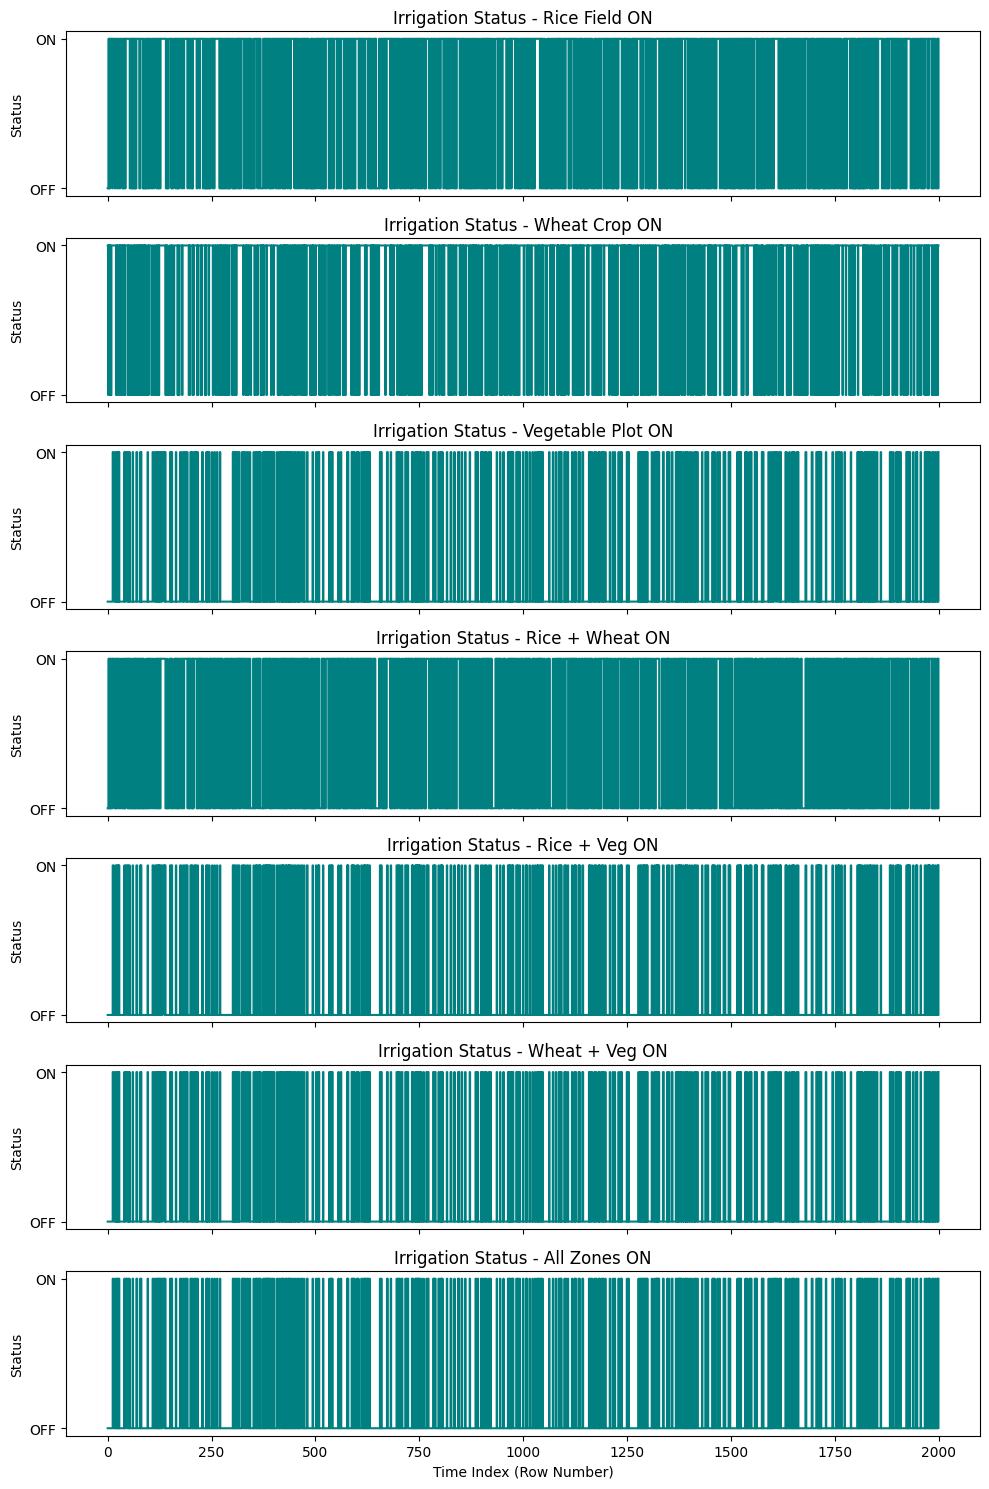

In [45]:
 #Plot pump activations
conditions = {
    "Rice Field ON": df['rice_field_zone'],
    "Wheat Crop ON": df['wheat_crop_zone'],
    "Vegetable Plot ON": df['vegetable_plot_zone'],
    "Rice + Wheat ON": df['rice_field_zone'] & df['wheat_crop_zone'],
    "Rice + Veg ON": df['rice_field_zone'] & df['vegetable_plot_zone'],
    "Wheat + Veg ON": df['wheat_crop_zone'] & df['vegetable_plot_zone'],
    "All Zones ON": df['rice_field_zone'] & df['wheat_crop_zone'] & df['vegetable_plot_zone'],
}
fig, axs = plt.subplots(nrows=len(conditions), figsize=(10, 15), sharex=True)
for ax, (title, condition) in zip(axs, conditions.items()):
    ax.step(df.index, condition.astype(int), where='post', linewidth=1.5, color='teal')
    ax.set_title(f"Irrigation Status - {title}")
    ax.set_ylabel("Status")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['OFF', 'ON'])

axs[-1].set_xlabel("Time Index (Row Number)")
plt.tight_layout()
plt.show()

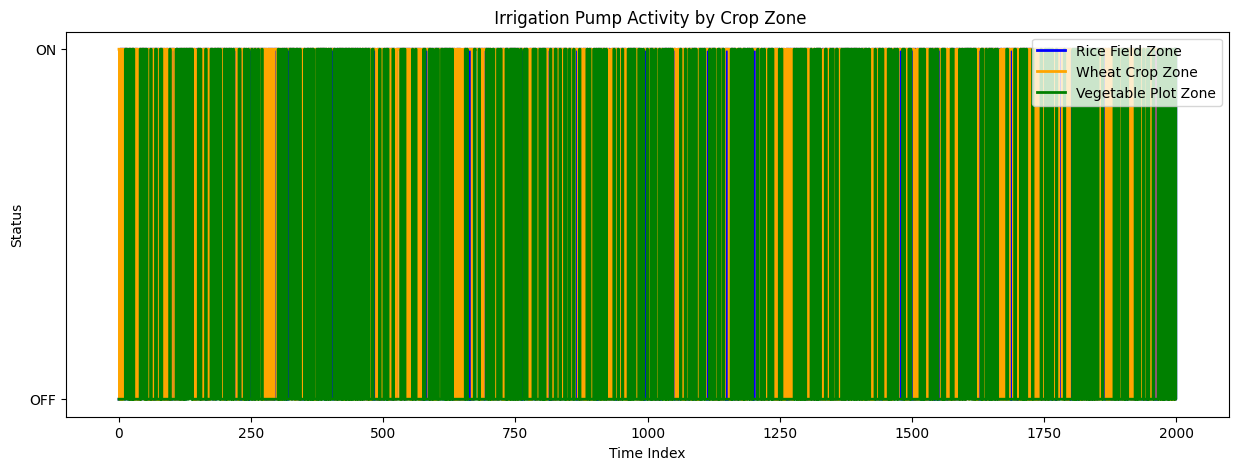

In [46]:
plt.figure(figsize=(15, 5))
plt.step(df.index, df['rice_field_zone'], where='post', linewidth=2, label='Rice Field Zone', color='blue')
plt.step(df.index, df['wheat_crop_zone'], where='post', linewidth=2, label='Wheat Crop Zone', color='orange')
plt.step(df.index, df['vegetable_plot_zone'], where='post', linewidth=2, label='Vegetable Plot Zone', color='green')
plt.title(" Irrigation Pump Activity by Crop Zone")
plt.xlabel("Time Index")
plt.ylabel("Status")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.legend(loc='upper right')
plt.show()


In [47]:
def get_zone_label(row):
    zones = ['rice_field_zone', 'wheat_crop_zone', 'vegetable_plot_zone']
    active = [z for z in zones if row[z] == 1]
    if len(active) == 1:
        return active[0]
    elif len(active) > 1:
        return 'multiple_zones'
    else:
        return 'no_zone'

df['dominant_zone'] = df.apply(get_zone_label, axis=1)

selected_sensors = [
    'soil_moisture_top', 'temperature_surface', 'ph_level', 'rainfall_mm', 'humidity_surface'
]

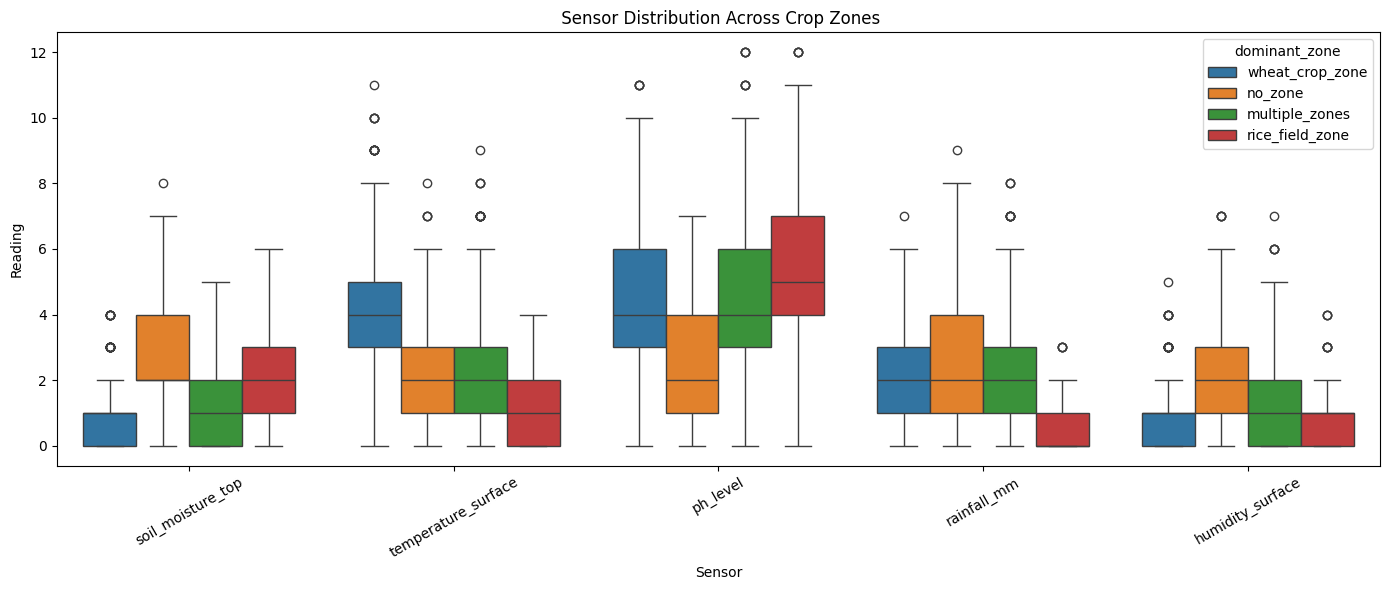

In [48]:
df_long = df.melt(id_vars='dominant_zone', value_vars=selected_sensors,
                  var_name='Sensor', value_name='Reading')
plt.figure(figsize=(14, 6))
sns.boxplot(x='Sensor', y='Reading', hue='dominant_zone', data=df_long)
plt.title(" Sensor Distribution Across Crop Zones")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


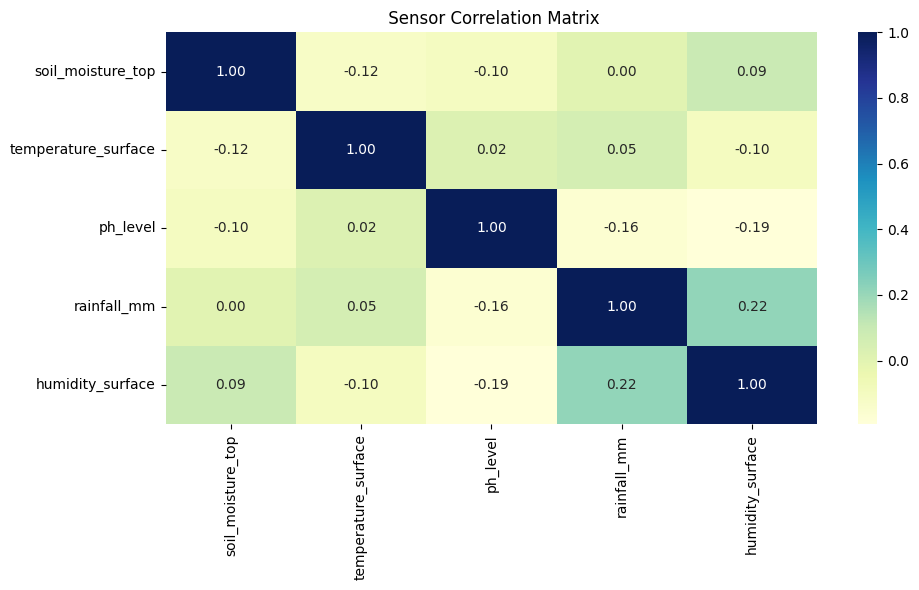

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_sensors].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title(" Sensor Correlation Matrix")
plt.tight_layout()
plt.show()


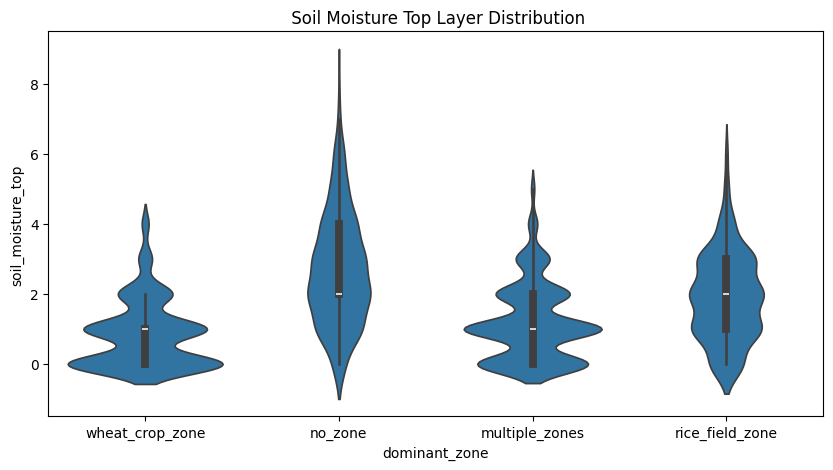

In [50]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='dominant_zone', y='soil_moisture_top', data=df)
plt.title(" Soil Moisture Top Layer Distribution")
plt.show()

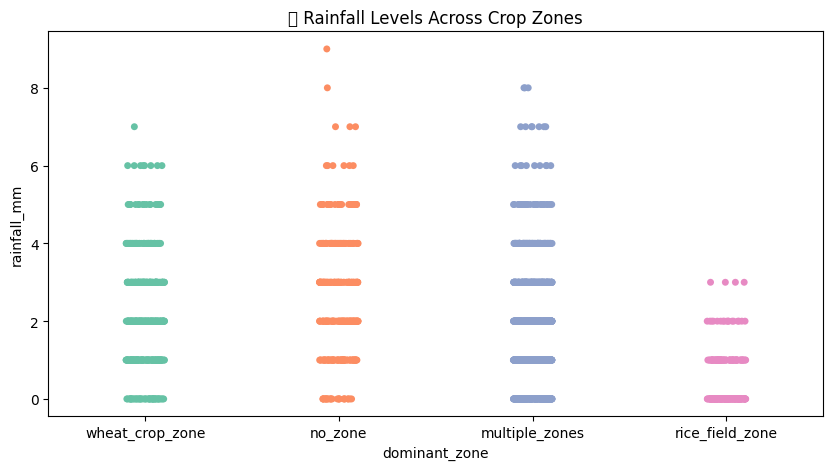

In [ ]:
plt.figure(figsize=(10, 5))
sns.stripplot(x='dominant_zone', y='rainfall_mm', data=df, jitter=True, palette='Set2')
plt.title(" Rainfall Levels Across Crop Zones")
plt.show()

In [52]:
joblib.dump(model_xgb, "Farm_Irrigation_XGB.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']